### Analizaremos la existencia de publicaciones repetidas

In [35]:
import pandas as pd
#importo las funciones para levantar los dataframes
%run "../../utils/dataset_parsing.ipynb"
df = levantar_datos("../../"+DATASET_RELATIVE_PATH)
#importo las funciones para graficar
%run "../../utils/graphs.ipynb"

### Consideramos que una publicación es igual a otra si comparten ciudad, precio, direccion, tipo de propiedad y metros totales. 

In [57]:
repetidas = df.groupby(['ciudad','provincia','precio','direccion','metrostotales','tipodepropiedad']).agg({"id":"count"})
repetidas=repetidas.loc[repetidas.id>1]
repetidas

id
ciudad                    provincia        precio    direccion                                 metrostotales tipodepropiedad    
Aguascalientes            Aguascalientes   1330000.0 José Guadalupe Posada                     120.0         Casa              2
                                           1995000.0 Sierra del Humo 311                       230.0         Casa              2
Alvarado                  Veracruz         1890000.0 lomas de la rioja                         158.0         Casa              2
                                           2700000.0 LOMAS DEL VALLE                           200.0         Casa              2
Alvaro Obregón            Distrito Federal 1400000.0 Lomas de Plateros                         75.0          Apartamento       2
...                                                                                                                           ..
Zapopan                   Jalisco          3800000.0 jardin de los pistaches                   228.0         Casa              3
Zempoala                  Hidalgo          900000.0  San Matilde Zempoala                      105.0         Casa              2
Chiautla                  Edo. de México   990000.0  Circuito San Francisco                    71.0          Casa              2
San Francisco de los Romo Aguascalientes   398000.0  Profesor Refugio Lara Martinez L119 - M01 252.0         Terreno           2
                                           600000.0  San Francisco de los Romo                 250.0         Casa              2

[369 rows x 1 columns]

### La cantidad de publicaciones repetidas según nuestro criterio no es significativa frente al total de los datos. Quisieramos mencionar que en el caso de diferentes departamentos con iguales caracteristicas en un mismo edificio, las publicaciones matchearán como repetidas.

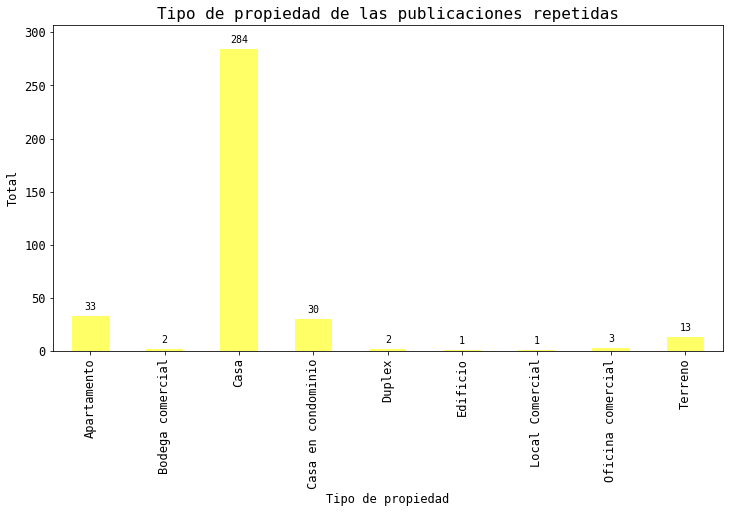

In [58]:
repetidas=repetidas.groupby("tipodepropiedad").agg({"id":"count"})
repetidas=repetidas.rename(columns={"id":"total"})
get_barplot(repetidas["total"], title="Tipo de propiedad de las publicaciones repetidas", x_label="Tipo de propiedad", y_label="Total",)

#### El grafico nos permite ver que la cantidad de apartamentos repetidos es muy baja, de modo que la influencia de departamentos iguales en un edificio es casi nula.